## Brain_Tumor_Prediction Using Mobilenet

#### Overview

- A brain tumor is a mass or growth of abnormal cells in your brain.

- Many different types of brain tumors exist. Some brain tumors are noncancerous (benign), and some brain tumors are cancerous (malignant). Brain tumors can begin in your brain (primary brain tumors), or cancer can begin in other parts of your body and spread to your brain (secondary, or metastatic, brain tumors).

- How quickly a brain tumor grows can vary greatly. The growth rate as well as location of a brain tumor determines how it will affect the function of your nervous system.

- Brain tumor treatment options depend on the type of brain tumor you have, as well as its size and location.

<img src="https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2014/10/30/15/17/mcdc7_brain_cancer-8col.jpg" width="250px">

#### Symptoms

General signs and symptoms caused by brain tumors may include:

        1. New onset or change in pattern of headaches
        2. Headaches that gradually become more frequent and more severe
        3. Unexplained nausea or vomiting
        4. Vision problems, such as blurred vision, double vision or loss of peripheral vision
        5. Gradual loss of sensation or movement in an arm or a leg
        6. Difficulty with balance
        7. Speech difficulties
        8. Confusion in everyday matters
        9. Personality or behavior changes
        10. Seizures, especially in someone who doesn't have a history of seizures
        11. Hearing problems

In [4]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [47]:
#data sugmentation
# Preprocessing the Training set
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.22)
training_set = datagen.flow_from_directory('train',
                                            target_size=(224,224),
                                            color_mode="rgb",
                                            subset="training",
                                            class_mode="binary",
                                            batch_size=32,
                                            shuffle=True)

Found 198 images belonging to 2 classes.


In [48]:
valid_generator=datagen.flow_from_directory( directory="train",
                                                target_size=(224,224),
                                                color_mode="rgb",
                                                subset="validation",
                                                class_mode="binary",
                                                batch_size=32,
                                                shuffle=True)

Found 55 images belonging to 2 classes.


In [49]:
## showing some image from training
!pip install matplotlib
import matplotlib.pyplot as plt
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [50]:
!pip install pillow

In [51]:
import PIL
import sys
from PIL import Image
sys.modules['Image'] = Image 

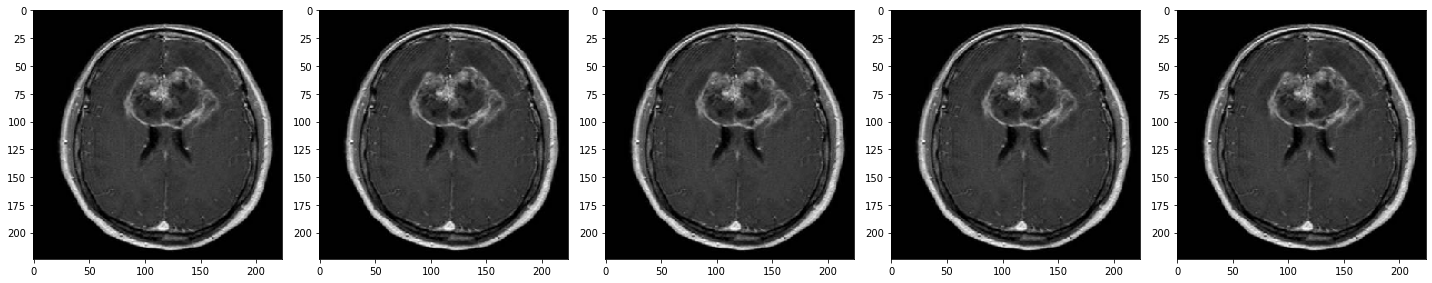

In [52]:
images = [training_set[0][0][0] for i in range(5)]
plotImages(images)

In [53]:
training_set.class_indices

{'no': 0, 'yes': 1}

In [54]:
!pip install --upgrade tensorflow
!pip install tensorflow_text
!pip install tensorflow_hub
import tensorflow_hub as hub    
import tensorflow_text as text

In [55]:
BATCH_SIZE = 5
IMG_SHAPE = 224 # match image dimension to mobile net input keep smae

In [56]:
# getting MobileNet
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobile_net = hub.KerasLayer(URL, input_shape=(IMG_SHAPE, IMG_SHAPE, 3))

In [57]:
mobile_net.trainable = False

In [58]:
model = tf.keras.models.Sequential([
    mobile_net,
    ### ann layer
    tf.keras.layers.Dense(1, activation='sigmoid') #[0, 1] or [1, 0]
    ])

In [59]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [60]:
history = model.fit(
    training_set,
    epochs=10,
    validation_data=valid_generator
    )

Epoch 1/10
7/7 [==============================] - 12s 976ms/step - loss: 0.8044 - accuracy: 0.4495 - val_loss: 0.7303 - val_accuracy: 0.6000
Epoch 2/10
7/7 [==============================] - 7s 996ms/step - loss: 0.6603 - accuracy: 0.6162 - val_loss: 0.6480 - val_accuracy: 0.6182
Epoch 3/10
7/7 [==============================] - 6s 909ms/step - loss: 0.5760 - accuracy: 0.7020 - val_loss: 0.5923 - val_accuracy: 0.6909
Epoch 4/10
7/7 [==============================] - 6s 929ms/step - loss: 0.5264 - accuracy: 0.7626 - val_loss: 0.5389 - val_accuracy: 0.7091
Epoch 5/10
7/7 [==============================] - 6s 901ms/step - loss: 0.4737 - accuracy: 0.8030 - val_loss: 0.4961 - val_accuracy: 0.7455
Epoch 6/10
7/7 [==============================] - 6s 994ms/step - loss: 0.4361 - accuracy: 0.8434 - val_loss: 0.4538 - val_accuracy: 0.7636
Epoch 7/10
7/7 [==============================] - 6s 887ms/step - loss: 0.4079 - accuracy: 0.8636 - val_loss: 0.4253 - val_accuracy: 0.8000
Epoch 8/10
7/7 [===

In [64]:
# Part 4 - Making a single prediction test
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('uploads/1_no.jpeg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result
print(result)

1/1 [==============================] - 0s 55ms/step
[[0.13072607]]


In [65]:
if result[0]<=0.5:
    print("No BrainTumor")
else:
    print("BrainTumor")

No BrainTumor


#save model
from tensorflow.keras.models import load_model
model.save('brain_tumor.h5')